<h1> Data Cleaning & Transformation with fifa 21 dataset</h1>

<h3>Transformations:</h3>
<li>-Conerting Heaight to inches ( Removing string cm ) ; Removing string lbs for weight.</li>
<li> -Removing the unnecessary newline characters from all columns that have them</li>
<li> -Based on the 'Joined' column, checking which players have been playing at a club for more than 10 years!</li>
<li> -'Value', 'Wage' and "Release Clause' are string columns. Converting them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.</li>
 <li>-Stripping those columns of these stars and making the columns numerical</li>
<li> -Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)</li>
<li> -Dropping photoUrl and playeURL: as those are irrelevant to the dataset.</li>
<li> -Splitting the columns Team & Contract</li>
<li> -Removing 'LongName' and keeping the 'Name' column at first</li>
<li> -Pushing 'ID' column to first</li>

<h4>Data Observation </h4>

In [4]:
# installing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot


In [6]:
data = pd.read_csv('fifa21_raw_data.csv', low_memory=False)


In [8]:
data.head()


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [10]:
# Cheking null
data.isnull().sum()

photoUrl       0
LongName       0
playerUrl      0
Nationality    0
Positions      0
              ..
PAS            0
DRI            0
DEF            0
PHY            0
Hits           0
Length: 77, dtype: int64

In [12]:
# Cheking DataTypes
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data_types = data.dtypes
print(data_types)

photoUrl            object
LongName            object
playerUrl           object
Nationality         object
Positions           object
Name                object
Age                  int64
↓OVA                 int64
POT                  int64
Team & Contract     object
ID                   int64
Height              object
Weight              object
foot                object
BOV                  int64
BP                  object
Growth               int64
Joined              object
Loan Date End       object
Value               object
Wage                object
Release Clause      object
Attacking            int64
Crossing             int64
Finishing            int64
Heading Accuracy     int64
Short Passing        int64
Volleys              int64
Skill                int64
Dribbling            int64
Curve                int64
FK Accuracy          int64
Long Passing         int64
Ball Control         int64
Movement             int64
Acceleration         int64
Sprint Speed         int64
A

<h4>Clean height and weight</h4>


In [19]:
print(data[['Height', 'Weight']].head())


  Height  Weight
0   5'7"  159lbs
1   6'2"  183lbs
2   6'2"  192lbs
3  5'11"  154lbs
4   5'9"  150lbs


In [ ]:
def height_to_inches(height):
    feet, inches = height.split("'")
    return int(feet) * 12 + int(inches.replace('"', ''))
data['Height'] = data['Height'].apply(height_to_inches)


In [ ]:
data['Weight'] = data['Weight'].str.replace('lbs', '').astype(int)

In [43]:
print(data[['Height', 'Weight']].head())


   Height  Weight
0      67     159
1      74     183
2      74     192
3      71     154
4      69     150


<h4> Removing the unnecessary newline characters from all columns that have them.</h4>

In [46]:
for column in data.select_dtypes(include=[object]):
    data[column] = data[column].str.replace('\n', '', regex=False)

In [48]:
data.head()


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,67,159,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,74,183,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,74,192,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,71,154,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,69,150,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,273


<h4>Separate Joined to year month and day </h4>

In [53]:
# Convertir les valeurs en format datetime
data['Joined'] = pd.to_datetime(data['Joined'], errors='coerce')

# Extraire les parties de la date
data['Day'] = data['Joined'].dt.day
data['Month'] = data['Joined'].dt.month
data['Year'] = data['Joined'].dt.year


In [55]:
data.head()


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Day,Month,Year
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,67,159,Left,93,RW,0,2004-07-01,NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,372,1,7,2004
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,74,183,Right,92,ST,0,2018-07-10,NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,344,10,7,2018
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,74,192,Right,91,GK,2,2014-07-16,NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,86,16,7,2014
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,71,154,Right,91,CAM,0,2015-08-30,NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,163,30,8,2015
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,69,150,Right,91,LW,0,2017-08-03,NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,273,3,8,2017


<h4> Converting value, wage, release Clause are string columns.</h4>
<h4> Converting them to numbers.M to Million.</h4>

In [59]:
def convert_financials(s):
    # Remove the currency symbol
    s = s.replace('€', '')

    # Convert millions 'M' to a number
    if 'M' in s:
        return float(s.replace('M', '')) * 1e6

    # Convert thousands 'K' to a number
    elif 'K' in s:
        return float(s.replace('K', '')) * 1e3

    # Return the value as it is
    return float(s)
# Apply the function to each of the financial columns
data['Value'] = data['Value'].apply(convert_financials)
data['Wage'] = data['Wage'].apply(convert_financials)
data['Release Clause'] = data['Release Clause'].apply(convert_financials)

data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Day,Month,Year
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,67,159,Left,93,RW,0,2004-07-01,NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,372,1,7,2004
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,74,183,Right,92,ST,0,2018-07-10,NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,344,10,7,2018
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,74,192,Right,91,GK,2,2014-07-16,NaN,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,86,16,7,2014
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,71,154,Right,91,CAM,0,2015-08-30,NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,163,30,8,2015
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,69,150,Right,91,LW,0,2017-08-03,NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,273,3,8,2017


<h4>Stripping those columns of these stars and making the columns numerical</h4>


In [63]:
data['SM'] = data['SM'].str.replace('★', '')
data['W/F'] = data['W/F'].str.replace('\n', '')

In [69]:
data['W/F'] = data['W/F'].str.replace('★', '')
data['IR'] = data['IR'].str.replace('★', '')

data.head()


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Day,Month,Year
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,67,159,Left,93,RW,0,2004-07-01,NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372,1,7,2004
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,74,183,Right,92,ST,0,2018-07-10,NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344,10,7,2018
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,74,192,Right,91,GK,2,2014-07-16,NaN,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86,16,7,2014
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,71,154,Right,91,CAM,0,2015-08-30,NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163,30,8,2015
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,69,150,Right,91,LW,0,2017-08-03,NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273,3,8,2017


<h4>Visualise which players are highly valuable but still underpaid (on low wages)</h4>

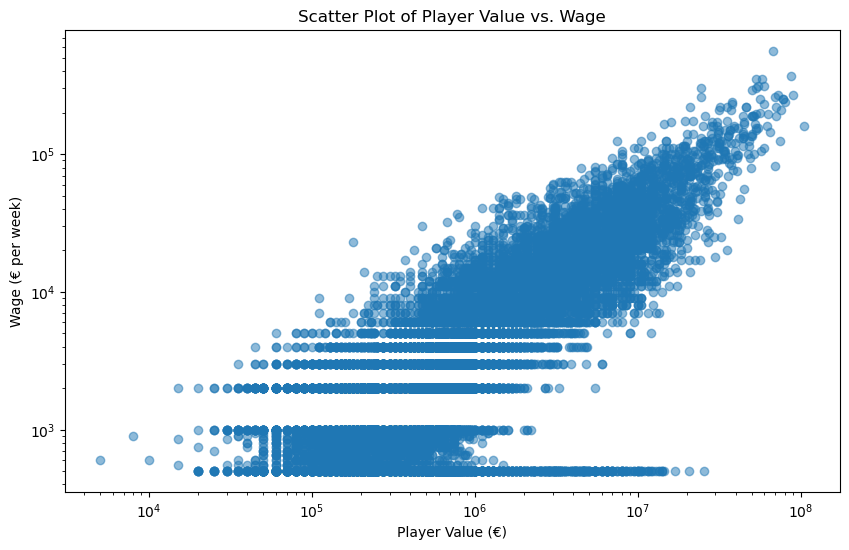

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Value'], data['Wage'], alpha=0.5)
plt.title('Scatter Plot of Player Value vs. Wage')
plt.xlabel('Player Value (€)')
plt.ylabel('Wage (€ per week)')
plt.xscale('log')
plt.yscale('log')
plt.show()


<h4>Dropping photoUrl and playeURL: as those are irrelevant to the dataset.</h4>

In [77]:
data = data.drop('photoUrl', axis=1)
data = data.drop('playerUrl', axis=1)

In [79]:
data.head()


,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Day,Month,Year
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,67,159,Left,93,RW,0,2004-07-01,NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372,1,7,2004
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,74,183,Right,92,ST,0,2018-07-10,NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344,10,7,2018
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,74,192,Right,91,GK,2,2014-07-16,NaN,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86,16,7,2014
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,71,154,Right,91,CAM,0,2015-08-30,NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163,30,8,2015
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,69,150,Right,91,LW,0,2017-08-03,NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273,3,8,2017


<h4>Splitting the columns Team & Contract</h4>


In [83]:
df = data.columns.get_loc('Team & Contract')

# Extract and insert 'Team' and 'Contract' columns
data.insert(df, 'Team', data['Team & Contract'].str.extract(r'([a-zA-Z\s]+)')[0])
data.insert(df + 1, 'Contract', data['Team & Contract'].str.extract(r'(\d{4} ~ \d{4})')[0])

# Drop the original 'Team & Contract' column
data.drop('Team & Contract', axis=1, inplace=True)

In [85]:
data.head()


,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team,Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Day,Month,Year
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona,2004 ~ 2021,158023,67,159,Left,93,RW,0,2004-07-01,NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372,1,7,2004
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus,2018 ~ 2022,20801,74,183,Right,92,ST,0,2018-07-10,NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344,10,7,2018
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atl,2014 ~ 2023,200389,74,192,Right,91,GK,2,2014-07-16,NaN,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86,16,7,2014
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City,2015 ~ 2023,192985,71,154,Right,91,CAM,0,2015-08-30,NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163,30,8,2015
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint,2017 ~ 2022,190871,69,150,Right,91,LW,0,2017-08-03,NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273,3,8,2017


In [89]:
df = data.columns.get_loc('LongName')
print(df)

0


<h4>Removing 'LongName' and keeping the 'Name' column at first</h4>


In [93]:
columns = ['Name'] + [col for col in data.columns if col != 'Name']

# Reindex the DataFrame columns based on the new order
data = data.reindex(columns=columns)

In [95]:
data.drop('LongName', axis=1, inplace=True)
data.head()


,Name,Nationality,Positions,Age,↓OVA,POT,Team,Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Day,Month,Year
0,L. Messi,Argentina,RW ST CF,33,93,93,FC Barcelona,2004 ~ 2021,158023,67,159,Left,93,RW,0,2004-07-01,NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372,1,7,2004
1,Cristiano Ronaldo,Portugal,ST LW,35,92,92,Juventus,2018 ~ 2022,20801,74,183,Right,92,ST,0,2018-07-10,NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344,10,7,2018
2,J. Oblak,Slovenia,GK,27,91,93,Atl,2014 ~ 2023,200389,74,192,Right,91,GK,2,2014-07-16,NaN,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86,16,7,2014
3,K. De Bruyne,Belgium,CAM CM,29,91,91,Manchester City,2015 ~ 2023,192985,71,154,Right,91,CAM,0,2015-08-30,NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163,30,8,2015
4,Neymar Jr,Brazil,LW CAM,28,91,91,Paris Saint,2017 ~ 2022,190871,69,150,Right,91,LW,0,2017-08-03,NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273,3,8,2017


In [97]:
# Pushing 'ID' column to first
columns = ['ID'] + [col for col in data.columns if col != 'ID']

data = data.reindex(columns=columns)

In [99]:
data.head()


,ID,Name,Nationality,Positions,Age,↓OVA,POT,Team,Contract,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Day,Month,Year
0,158023,L. Messi,Argentina,RW ST CF,33,93,93,FC Barcelona,2004 ~ 2021,67,159,Left,93,RW,0,2004-07-01,NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372,1,7,2004
1,20801,Cristiano Ronaldo,Portugal,ST LW,35,92,92,Juventus,2018 ~ 2022,74,183,Right,92,ST,0,2018-07-10,NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344,10,7,2018
2,200389,J. Oblak,Slovenia,GK,27,91,93,Atl,2014 ~ 2023,74,192,Right,91,GK,2,2014-07-16,NaN,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86,16,7,2014
3,192985,K. De Bruyne,Belgium,CAM CM,29,91,91,Manchester City,2015 ~ 2023,71,154,Right,91,CAM,0,2015-08-30,NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163,30,8,2015
4,190871,Neymar Jr,Brazil,LW CAM,28,91,91,Paris Saint,2017 ~ 2022,69,150,Right,91,LW,0,2017-08-03,NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273,3,8,2017


<h4>Save data to csv</h4>

In [ ]:
data.to_csv('fifa_cleaned.csv', index=False)
